# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**:
<br/>
Felipe Ottoni Pereira
<br/>
Letícia Almeida Paulino de Alencar Ferreira
<br/>

**RA**:
<br/>
804317 (Felipe)
<br/>
800408 (Letícia)


---
# I. Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

imports e instalações básicas

In [1]:
# imports
import pandas as pd
import numpy as np

### Leitura users_info
utiliza a função *read_users_info()* para ler e transformar o arquivo em um DataFrame que é combinado com os dados de treino *train.csv* para se obter os labels. Criando também um dataframe com os dados integrados aos usuários de teste. Portanto cria 2 DataFrames: *df_users_info_train* e *df_users_info_test*

In [2]:
# lendo users_info.txt em um dataframe
from scripts import read_users_info
df_users_info = read_users_info()

# junção para adquirir as classes (treino)
df_train = pd.read_csv("dataset/train.csv")
df_users_info_train = df_users_info.merge(df_train, on="Id", how="inner")

# junção com os dados de teste
df_test = pd.read_csv("dataset/test.csv")
df_users_info_test = df_users_info.merge(df_test, on="Id", how="right") 
df_users_info_test.info() #visualização

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Id                                 25 non-null     object 
 1   Gender                             25 non-null     object 
 2   Age                                23 non-null     float64
 3   Height (cm)                        23 non-null     float64
 4   Weight (kg)                        23 non-null     float64
 5   Does physical activity regularly?  23 non-null     object 
 6   Protocol                           25 non-null     object 
 7   Stress Inducement                  25 non-null     object 
 8   Aerobic Exercise                   22 non-null     object 
 9   Anaerobic Exercise                 23 non-null     object 
dtypes: float64(3), object(7)
memory usage: 2.1+ KB


Após a leitura é realizado a visualização do DataFrame gerado e de suas principais métricas descritivas e quantitativas como: tamanho, valores nulos, métricas por coluna (média, desvio padrão, etc) e presença de duplicatas

In [3]:
# análise básica do dataframe users_info
display(df_users_info_train.head(n=10))
print("\nInfo:")
df_users_info_train.info()
print("\nDescribe (métricas):")
print(df_users_info_train.describe())
print("\nShape:")
print(df_users_info_train.shape)
print("\nQuantidade Valores Nulos:")
print(df_users_info_train.isnull().sum())
print("\nLinhas Duplicadas:")
print(df_users_info_train.duplicated().sum())

,Id,Gender,Age,Height (cm),Weight (kg),Does physical activity regularly?,Protocol,Stress Inducement,Aerobic Exercise,Anaerobic Exercise,Label
0,U_27250,m,20.0,185.0,95.0,No,V1,Yes****,Yes,Yes,AEROBIC
1,U_82422,f,NaN,NaN,NaN,NaN,V2,Yes,NaN,NaN,STRESS
2,U_35900,m,21.0,175.0,65.0,Yes,V1,Yes,Yes,Yes,ANAEROBIC
3,U_30402,m,21.0,174.0,70.0,Yes,V1,Yes,Yes,Yes,ANAEROBIC
4,U_94914,m,21.0,172.0,70.0,Yes,V1,Yes,Yes,Yes***,STRESS
5,U_81466,f,29.0,154.0,56.0,No,V2,Yes,Yes,Yes,ANAEROBIC
6,U_92226,m,NaN,NaN,NaN,NaN,V2,Yes,NaN,NaN,STRESS
7,U_20551,f,25.0,152.0,61.0,No,V2,Yes,Yes,Yes,AEROBIC
8,U_94349,m,21.0,192.0,84.0,Yes,V1,Yes,Yes,Yes****,AEROBIC
9,U_38235,m,21.0,173.0,72.0,Yes,V1,Yes,Yes,Yes,STRESS



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Id                                 75 non-null     object 
 1   Gender                             75 non-null     object 
 2   Age                                71 non-null     float64
 3   Height (cm)                        71 non-null     float64
 4   Weight (kg)                        71 non-null     float64
 5   Does physical activity regularly?  71 non-null     object 
 6   Protocol                           75 non-null     object 
 7   Stress Inducement                  75 non-null     object 
 8   Aerobic Exercise                   70 non-null     object 
 9   Anaerobic Exercise                 71 non-null     object 
 10  Label                              75 non-null     object 
dtypes: float64(3), object(8)
memory usage: 6.6+ KB

Descr

### Análise Gráficos: *df_users_info_train*
Com base na interpretação e na análise exploratória desses gráficos é possível comparar a distribuição das features com relação as classes (Label), determinar o  impacto de poder discriminativo delas, além de também identificar *features* redundantes e *outliers*.
1. Gráficos de pizza: Visualizar a proporção de variáveis categóricas demográficas

2. Boxplots por *features*: Essencial para identificar outliers, avaliar a simetria da distribuição de cada *feature*

3. Pairplots: Pode identificar correlação entre features, *features* redundantes e poder discriminativo com relação ao *Label*

4. HeatMap: Pode identificar correlação entre features, *features* redundantes

5. Matriz de Box Plots por Classe: para medir visualmente o poder discriminativo.
    - Alto Impacto: Os Boxplots das classes estão distintos e pouco sobrepostos, mediana e IQRs separados.
    - Baixo Impacto: Os Boxplots das classes estão altamente sobrepostos, medianas e IQRs similares.



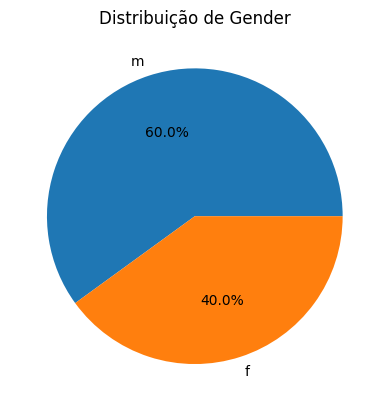

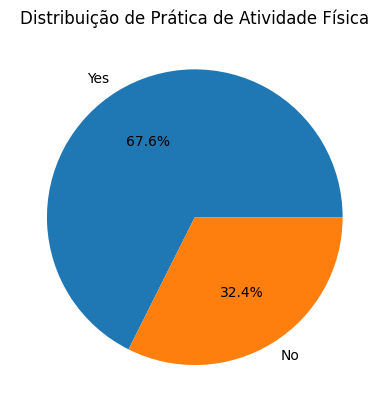

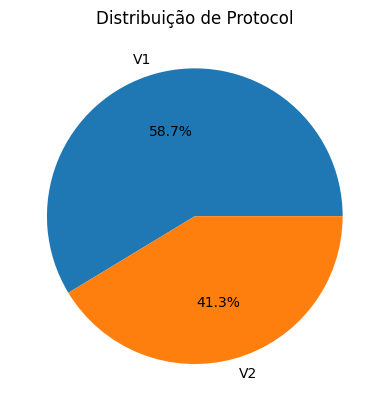

In [4]:
import matplotlib.pyplot as plt

# Gráfico de pizza do Gender
plt.figure()
df_users_info_train["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Distribuição de Gender")
plt.show()

# Gráfico de pizza do "Does physical activity regularly?"
plt.figure()
df_users_info_train["Does physical activity regularly?"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("") 
plt.title("Distribuição de Prática de Atividade Física")
plt.show()

# Gráfico de pizza do Protocol
plt.figure()
df_users_info_train["Protocol"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("") 
plt.title("Distribuição de Protocol")
plt.show()

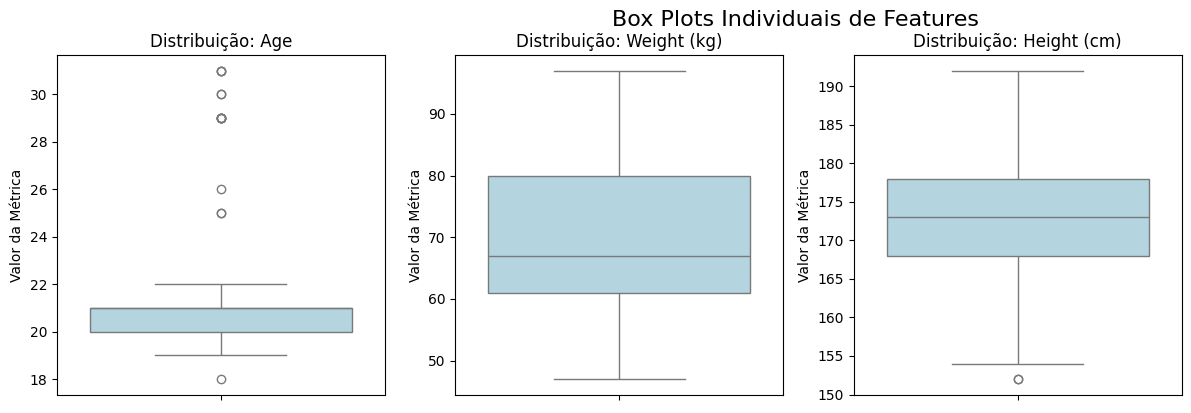

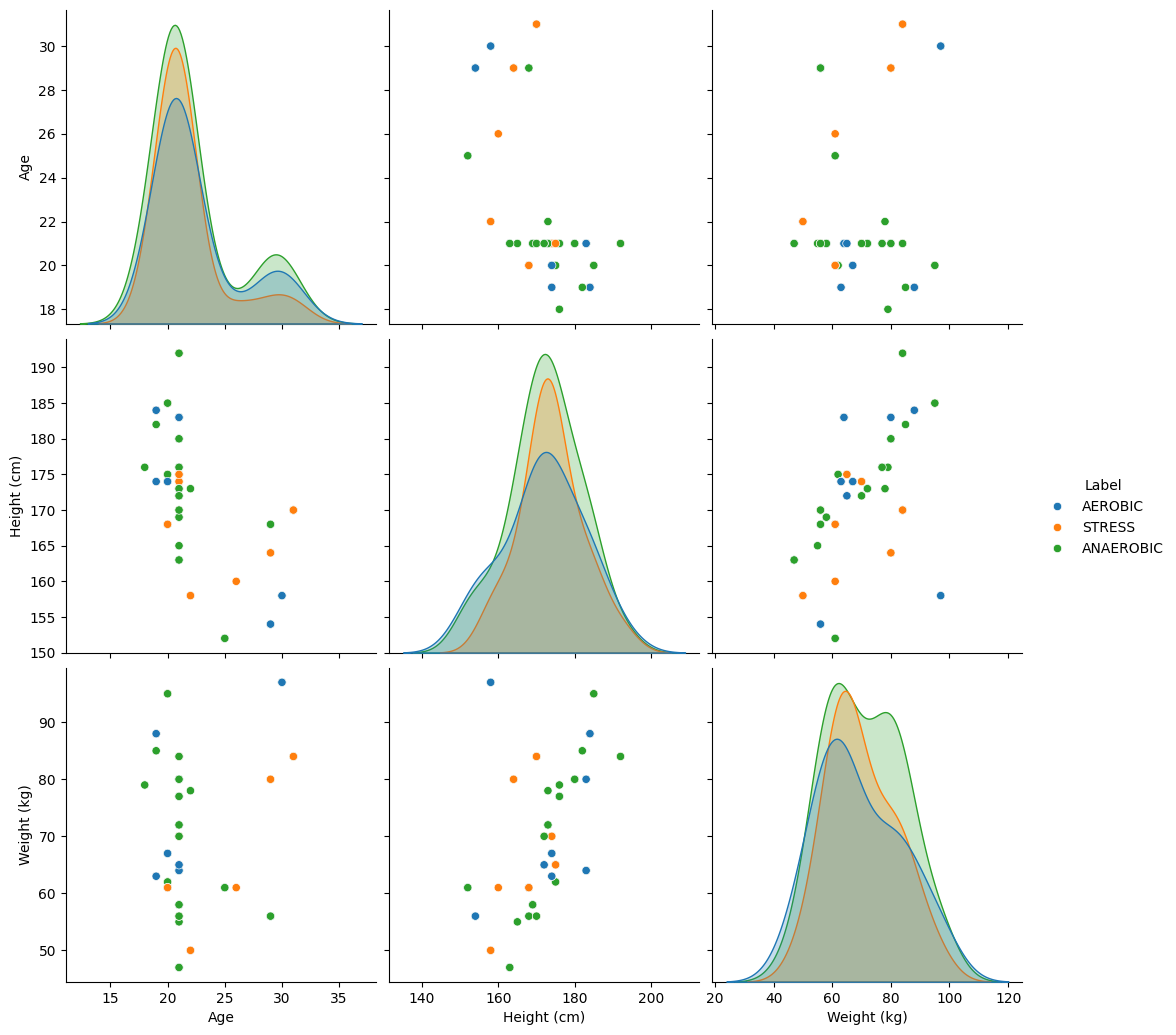

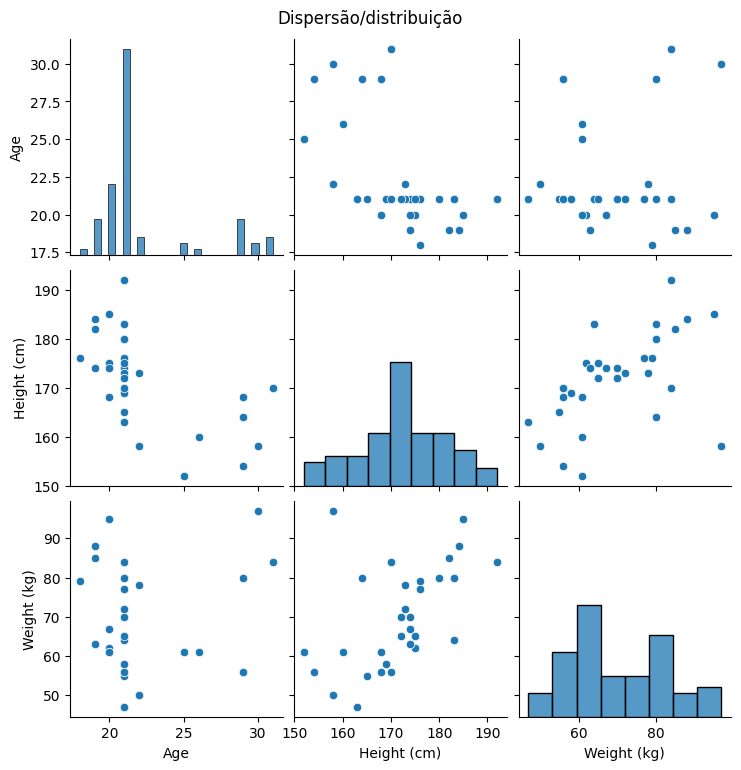

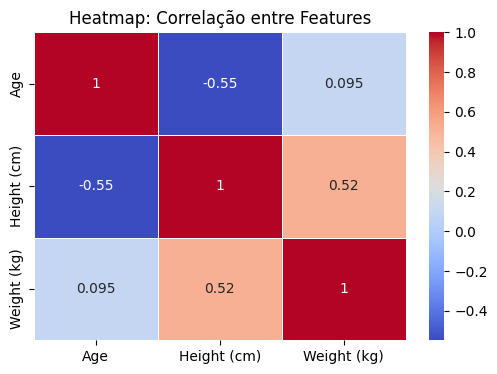

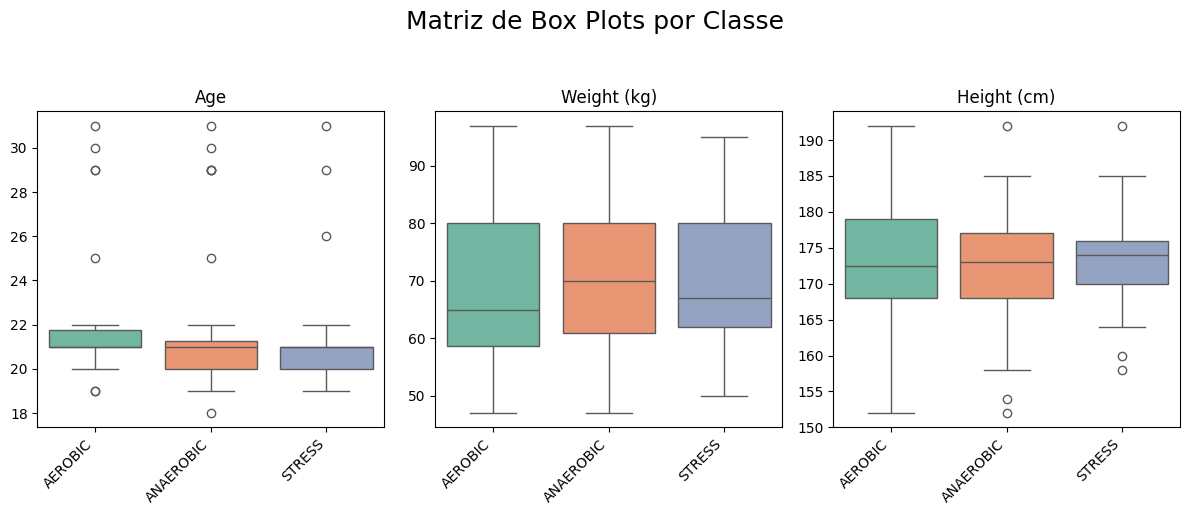

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import plot_boxplots_por_classe, plot_heatmap, plot_individual_boxplots

# BOXPLOTS: users_info_train
plot_individual_boxplots(df_users_info_train[['Age','Weight (kg)','Height (cm)','Label']])

# PAIRPLOT (v1): df_users_info_train 
sns.pairplot(df_users_info_train, hue='Label', height=3.5)
plt.show()

# PAIRPLOT (v2): df_users_info_train 
numeric_cols_users = df_users_info_train[['Age', 'Height (cm)', 'Weight (kg)']] 
sns.pairplot(numeric_cols_users)
plt.suptitle("Dispersão/distribuição", y=1.02)
plt.show()

# HEATMAP: df_users_info_train
plot_heatmap(df_users_info_train[["Age", "Height (cm)", "Weight (kg)"]], annot=True, figsize=(6, 4))

# BOXPLOT POR CLASSE: df_users_info
plot_boxplots_por_classe(df_users_info_train[['Age','Weight (kg)','Height (cm)','Label']])

### F-SCORE análise: *df_users_info_train*
$$\text{F-Score} = \frac{\text{Variância ENTRE os grupos (classes)}}{\text{Variância DENTRO dos grupos}}$$
Realizado o F-score para cada *feature*, indicando a força da separação entre os grupos daquela *feature*, contribuindo juntamente com os gráficos de Boxplots e HeatMap para determinar quais features podem ser removidas e quais devem ser mantidas.
- F-Score Alto e P-Value Baixo: A feature é estatisticamente significativa para separar as classes.
- F-Score Baixo e P-Value Alto: Não há evidência estatística para dizer que a média da feature difere entre as classes.

In [6]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer
import numpy as np
from scripts import compute_fscore_ranking

# Calculo F-SCORE
ranking_users = compute_fscore_ranking(
    df_users_info_train,
    label_col="Label",
    id_cols=["Id"]
)

print(ranking_users)


                                  Feature   F_Score   P_Value
7                 Stress Inducement_Yes**  1.000000  0.372931
6                  Stress Inducement_Yes*  0.522234  0.595424
12              Anaerobic Exercise_Yes***  0.418708  0.659488
0                                     Age  0.412942  0.663257
5                             Protocol_V2  0.286413  0.751804
3                                Gender_m  0.235294  0.790944
1                             Height (cm)  0.232130  0.793434
4   Does physical activity regularly?_Yes  0.198327  0.820548
11               Anaerobic Exercise_Yes**  0.142965  0.867030
2                             Weight (kg)  0.125808  0.881977
10                Aerobic Exercise_Yes***  0.115919  0.890713
8               Stress Inducement_Yes****  0.014616  0.985493
9                  Aerobic Exercise_Yes**  0.014616  0.985493
13             Anaerobic Exercise_Yes****  0.014616  0.985493


### Leitura dos sensores (ACC, EDA, HR, IBI, TEMP, etc) e criação do *df_sensors*
Com objetivo de criar uma linha (amostra) por usuário, cada pasta de usuário e seus respetivos CSVs com as coletas dos sensores são percorridas, buscando diferentes formas de sumarizações/combinações de seus valores em apenas um valor (criando/descobrindo *features* para o modelo) para cada usuário.
Abaixo segue a descrição das principais *features*/medidas descobertas para o modelo com base em cada arquivo de sensor:


Após isso o DataFrame é combinado com os dados de treino para obter o campo *Label*

In [7]:
import os
import traceback
from scripts import sumarize_sensor, process_BVP, process_EDA, process_HR, process_IBI, process_TEMP, process_ACC

base_path = "dataset/wearables"

df_sensors = pd.DataFrame()

for user_id in df_users_info["Id"]:
    
    user_folder = os.path.join(base_path, user_id)
    
    if not os.path.exists(user_folder):
        print(f"Aviso: pasta do usuário {user_id} não encontrada.")
        continue
    
    df_user_id = pd.DataFrame({'Id': [user_id]})
    
    # Sumarizar métricas de cada sensor
    try:
        df_acc = sumarize_sensor(user_folder, "ACC.csv", process_ACC, add_ts=True)
        df_bvp = sumarize_sensor(user_folder, "BVP.csv", process_BVP, add_ts=True)
        df_eda = sumarize_sensor(user_folder, "EDA.csv", process_EDA, add_ts=True)
        df_hr = sumarize_sensor(user_folder, "HR.csv", process_HR, add_ts=True)
        df_ibi = sumarize_sensor(user_folder, "IBI.csv", process_IBI, add_ts=False)
        df_temp = sumarize_sensor(user_folder, "TEMP.csv", process_TEMP, add_ts=True)
    except Exception as e:
        print(f"Erro de leitura no usuário {user_id}: {e}")
        # traceback.print_exc()
        continue
    # junção das métricas e user_id
    df_metrics = pd.concat([ df_user_id, df_acc, df_bvp, df_eda, df_hr, df_ibi, df_temp], axis=1)
    df_sensors = pd.concat([df_sensors, df_metrics], axis = 0, ignore_index=True)

# DataFrame final com métricas
display(df_sensors)

# Cria df_sensors_train e df_sensors_test
df_sensors_train = df_sensors.merge(df_train, on="Id", how="inner") 
df_sensors_test = df_sensors.merge(df_test, on="Id", how="right") 


Erro de leitura no usuário U_87186: could not convert string to float: ' IBI'
Erro ao ler dataset/wearables\U_89740\IBI.csv: No columns to parse from file
Erro de leitura no usuário U_89740: 'NoneType' object has no attribute 'astype'


,Id,STD_X_ACC,STD_Y_ACC,STD_Z_ACC,Mean_Magnitude_ACC,STD_Magnitude_ACC,coef_Magnitude_ACC,Mean_BVP,STD_BVP,Min_BVP,...,Median_IBI,Q1_IBI,Q3_IBI,Range_IBI,RMSSD_IBI,Mean_TEMP,Range_TEMP,Min_TEMP,Max_TEMP,coef_TEMP
0,U_21920,11.338335,10.852022,16.464078,64.184155,2.526444,0.000305,-0.003213,39.081845,-745.73,...,0.875000,0.812500,0.921875,0.531250,0.052961,34.273373,7.30,27.93,35.23,0.001530
1,U_27250,6.101109,3.408618,4.319164,63.862681,1.873692,0.000209,0.003456,48.570026,-549.96,...,0.468750,0.421875,0.515625,0.437500,0.036130,32.777873,2.34,31.71,34.05,0.001112
2,U_82422,20.176866,19.542436,26.521348,63.608307,4.187574,-0.000118,0.000648,54.396609,-623.08,...,0.828125,0.765625,0.890625,0.781250,0.092662,32.959323,1.74,32.37,34.11,-0.000066
3,U_35900,5.895799,5.406901,9.905712,64.856920,2.848737,-0.000315,0.002445,44.829017,-551.33,...,0.390625,0.359375,0.421875,0.468750,0.048288,32.440881,7.78,27.69,35.47,-0.001230
4,U_30402,15.377926,5.677559,6.436747,64.891841,3.712815,0.000353,-0.001947,50.522170,-810.83,...,0.578125,0.484375,0.765625,0.687500,0.115004,32.178336,7.88,26.23,34.11,0.000472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,U_92575,19.013523,32.370713,31.539569,134.903297,19.136337,0.013455,-0.023380,57.532866,-549.81,...,0.468750,0.406250,0.671875,0.750000,0.103075,32.023653,4.04,29.53,33.57,-0.002227
94,U_91344,15.757978,3.398167,10.146569,64.448385,2.089647,0.000016,0.026798,68.500534,-589.31,...,0.515625,0.484375,0.531250,0.515625,0.053500,31.958570,0.99,31.67,32.66,0.000431
95,U_50892,24.501247,28.637030,16.822815,63.613543,5.645319,0.000258,-0.015167,65.329052,-729.11,...,0.437500,0.406250,0.468750,1.015625,0.077832,29.755823,1.44,29.13,30.57,0.000444
96,U_71408,15.678918,3.425732,7.843111,63.610670,0.938931,0.000064,0.002981,19.337796,-549.96,...,0.843750,0.781250,0.875000,0.656250,0.044854,30.069700,3.06,28.67,31.73,-0.000685


Após a leitura é realizado a visualização do DataFrame gerado e de suas principais métricas descritivas e quantitativas como: tamanho, valores nulos, métricas por coluna (média, desvio padrão, etc) e presença de duplicatas.

In [8]:
# análise básica do dataframe df_sensors_train
display(df_sensors_train)
print("\nInfo:")
df_sensors_train.info()
print("\nDescribe (métricas):")
print(df_sensors_train.describe())
print("\nShape:")
print(df_sensors_train.shape)
print("\nQuantidade Valores Nulos:")
print(df_sensors_train.isnull().sum())
print("\nLinhas Duplicadas:")
print(df_sensors_train.duplicated().sum())

# análise básica do dataframe df_sensors_train
display(df_sensors_test)
print("\nInfo:")
df_sensors_test.info()
print("\nDescribe (métricas):")
print(df_sensors_test.describe())
print("\nShape:")
print(df_sensors_test.shape)
print("\nQuantidade Valores Nulos:")
print(df_sensors_test.isnull().sum())
print("\nLinhas Duplicadas:")
print(df_sensors_test.duplicated().sum())

,Id,STD_X_ACC,STD_Y_ACC,STD_Z_ACC,Mean_Magnitude_ACC,STD_Magnitude_ACC,coef_Magnitude_ACC,Mean_BVP,STD_BVP,Min_BVP,...,Q1_IBI,Q3_IBI,Range_IBI,RMSSD_IBI,Mean_TEMP,Range_TEMP,Min_TEMP,Max_TEMP,coef_TEMP,Label
0,U_27250,6.101109,3.408618,4.319164,63.862681,1.873692,0.000209,0.003456,48.570026,-549.96,...,0.421875,0.515625,0.437500,0.036130,32.777873,2.34,31.71,34.05,0.001112,AEROBIC
1,U_82422,20.176866,19.542436,26.521348,63.608307,4.187574,-0.000118,0.000648,54.396609,-623.08,...,0.765625,0.890625,0.781250,0.092662,32.959323,1.74,32.37,34.11,-0.000066,STRESS
2,U_35900,5.895799,5.406901,9.905712,64.856920,2.848737,-0.000315,0.002445,44.829017,-551.33,...,0.359375,0.421875,0.468750,0.048288,32.440881,7.78,27.69,35.47,-0.001230,ANAEROBIC
3,U_30402,15.377926,5.677559,6.436747,64.891841,3.712815,0.000353,-0.001947,50.522170,-810.83,...,0.484375,0.765625,0.687500,0.115004,32.178336,7.88,26.23,34.11,0.000472,ANAEROBIC
4,U_94914,9.358314,16.985190,9.382421,63.606232,1.663746,-0.000484,-0.003224,50.838881,-723.56,...,0.609375,0.703125,0.437500,0.034005,33.698857,0.69,33.15,33.84,-0.000032,STRESS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,U_60647,5.628006,3.954855,6.363700,64.730718,2.285215,-0.000021,-0.001660,67.349098,-996.01,...,0.390625,0.453125,0.765625,0.113968,200.873763,200.94,33.23,234.17,0.091568,ANAEROBIC
69,U_92575,19.013523,32.370713,31.539569,134.903297,19.136337,0.013455,-0.023380,57.532866,-549.81,...,0.406250,0.671875,0.750000,0.103075,32.023653,4.04,29.53,33.57,-0.002227,ANAEROBIC
70,U_91344,15.757978,3.398167,10.146569,64.448385,2.089647,0.000016,0.026798,68.500534,-589.31,...,0.484375,0.531250,0.515625,0.053500,31.958570,0.99,31.67,32.66,0.000431,ANAEROBIC
71,U_50892,24.501247,28.637030,16.822815,63.613543,5.645319,0.000258,-0.015167,65.329052,-729.11,...,0.406250,0.468750,1.015625,0.077832,29.755823,1.44,29.13,30.57,0.000444,ANAEROBIC



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  73 non-null     object 
 1   STD_X_ACC           73 non-null     float64
 2   STD_Y_ACC           73 non-null     float64
 3   STD_Z_ACC           73 non-null     float64
 4   Mean_Magnitude_ACC  73 non-null     float64
 5   STD_Magnitude_ACC   73 non-null     float64
 6   coef_Magnitude_ACC  73 non-null     float64
 7   Mean_BVP            73 non-null     float64
 8   STD_BVP             73 non-null     float64
 9   Min_BVP             73 non-null     float64
 10  Max_BVP             73 non-null     float64
 11  Range_BVP           73 non-null     float64
 12  coef_BVP            73 non-null     float64
 13  Mean_EDA            73 non-null     float64
 14  STD_EDA             73 non-null     float64
 15  Min_EDA             73 non-null     float64
 16  Max

,Id,STD_X_ACC,STD_Y_ACC,STD_Z_ACC,Mean_Magnitude_ACC,STD_Magnitude_ACC,coef_Magnitude_ACC,Mean_BVP,STD_BVP,Min_BVP,...,Median_IBI,Q1_IBI,Q3_IBI,Range_IBI,RMSSD_IBI,Mean_TEMP,Range_TEMP,Min_TEMP,Max_TEMP,coef_TEMP
0,U_19341,11.230538,12.340277,12.155166,62.052546,1.306815,0.000214,0.003724,35.465922,-550.40,...,0.921875,0.890625,0.953125,0.359375,0.040356,34.145593,1.86,32.87,34.73,0.000760
1,U_54670,9.781269,4.030302,4.630621,62.702857,2.699789,0.000326,0.018384,29.195393,-549.96,...,0.671875,0.625000,0.718750,0.781250,0.068258,33.831236,2.06,32.43,34.49,0.000020
2,U_21920,11.338335,10.852022,16.464078,64.184155,2.526444,0.000305,-0.003213,39.081845,-745.73,...,0.875000,0.812500,0.921875,0.531250,0.052961,34.273373,7.30,27.93,35.23,0.001530
3,U_58128,22.954823,23.637062,19.972933,64.775251,4.470021,-0.000565,0.038003,91.551143,-1339.78,...,0.484375,0.468750,0.578125,1.140625,0.095739,29.966501,3.04,28.03,31.07,-0.000009
4,U_73365,13.466869,8.063870,9.473588,64.512871,4.790789,0.000148,-0.003697,100.187034,-793.52,...,0.562500,0.515625,0.593750,0.718750,0.047572,33.278085,4.45,31.71,36.16,0.001226
5,U_89682,24.476144,35.412278,20.456461,64.912249,7.480899,-0.001400,-0.013685,46.273558,-549.96,...,0.734375,0.703125,0.765625,0.312500,0.042616,34.285511,0.72,33.83,34.55,0.000790
6,U_11501,15.720305,14.303376,28.042970,62.349369,2.532530,-0.000006,-0.002773,28.970356,-549.96,...,0.734375,0.671875,0.781250,0.687500,0.053597,32.729382,1.86,31.47,33.33,0.000764
7,U_46423,21.708258,13.882329,24.822681,63.911356,2.220289,0.000019,0.004889,45.043395,-1340.25,...,0.796875,0.718750,0.859375,0.640625,0.073810,32.160974,5.54,28.33,33.87,-0.000347
8,U_71408,15.678918,3.425732,7.843111,63.610670,0.938931,0.000064,0.002981,19.337796,-549.96,...,0.843750,0.781250,0.875000,0.656250,0.044854,30.069700,3.06,28.67,31.73,-0.000685
9,U_95655,12.852375,10.395236,15.475674,64.428702,2.957891,0.000110,-0.009041,38.005585,-549.96,...,0.609375,0.515625,0.718750,0.718750,0.147273,32.457042,444.41,30.85,475.26,-0.002650



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  25 non-null     object 
 1   STD_X_ACC           25 non-null     float64
 2   STD_Y_ACC           25 non-null     float64
 3   STD_Z_ACC           25 non-null     float64
 4   Mean_Magnitude_ACC  25 non-null     float64
 5   STD_Magnitude_ACC   25 non-null     float64
 6   coef_Magnitude_ACC  25 non-null     float64
 7   Mean_BVP            25 non-null     float64
 8   STD_BVP             25 non-null     float64
 9   Min_BVP             25 non-null     float64
 10  Max_BVP             25 non-null     float64
 11  Range_BVP           25 non-null     float64
 12  coef_BVP            25 non-null     float64
 13  Mean_EDA            25 non-null     float64
 14  STD_EDA             25 non-null     float64
 15  Min_EDA             25 non-null     float64
 16  Max

### Descrição dos Atributos

Para cada sensor foi buscado sumarizar seus valores de coletas em diversos valores e dados estatíscos padrões, criando novas features com apenas um valo representando por amostra

1. ACC (acelerômetro):
mede o movimento do corpo, aceleração em cada eixo.

    - STD_X_ACC, STD_Y_ACC, STD_Z_ACC: Desvio Padrão da aceleração em cada eixo. é o indicador mais robusto de movimento

    - Mean_Magnitude_ACC: A média da Magnitude, resonsável por sumariza os valores dos 3 eixos em um único valor de intensidade do movimento do corpo

    - STD_Magnitude: desvio padrão da magnitude, mede sua variabilidade

    - coef_Magnitude: Coeficiente angular da magnitude, avalia o crescimento da magnitude

2.  BVP (Blood Volume Pulse):
medida fisiológica que indica as alterações no volume de sangue em uma parte específica do corpo (geralmente um dedo ou lóbulo da orelha) a cada batimento cardíaco.

    - Mean_BVP: Média do volume de Pulso Sanguíneo

    - STD_BVP: Desvio padrão do volume de Pulso Sanguíneo

    - Min_BVP: Menor valor de volume de Pulso Sanguíneo, pode ajudar a analisar vasoconstrição

    - Max_BVP: Maior valor de volume de Pulso Sanguíneo, pode ajudar a analisar vasoconstrição

    - Range_BVP: intervalo de volume de Pulso Sanguíneo durante o experimento, pode ajudar a analisar vasoconstrição

    - coef_BVP: Coeficiente angular do volume de pulso sanguíneo durante o experimento, avalia o crescimento do BVP


3. EDA (Atividade Eletrodérmica):
medida da atividade elétrica da pele que reflete a resposta do sistema nervoso

    - Mean_EDA: Média da Atividade Eletrodérmica

    - STD_EDA: Desvio padrão da Atividade Eletrodérmica

    - Min_EDA: Menor valor da Atividade Eletrodérmica, podem ajudar a capturar picos de estresse ou reações emocionais agudas

    - Max_EDA: Maior valor da Atividade Eletrodérmica, podem ajudar a capturar picos de estresse ou reações emocionais agudas

    - Range_EDA: Intervalo da Atividade Eletrodérmica, podem ajudar a capturar picos de estresse ou reações emocionais agudas

    - coef_EDA: Coeficiente angular da da Atividade Eletrodérmica, avalia o cresmento de EDA

    - Mean_Tonic_EDA: Média do componente tônico da EDA (nível basal), associada ao estado geral de ativação do sistema nervoso simpático.

    - STD_Tonic_EDA: Desvio padrão do componente tônico, indicando a variabilidade do nível basal ao longo da janela temporal.

    - Mean_Phasic_EDA: Média do componente fásico da EDA (respostas rápidas), relacionada à intensidade média das respostas emocionais imediatas.

    - STD_Phasic_EDA: Desvio padrão do componente fásico, representando a variabilidade e frequência das respostas rápidas como picos e micro-oscilações.

4. HR (frequência cardíaca):

    - Mean_HR: média de HR ao longo do experimento

    - STD_HR: desvio padrão de HR ao longo do experimento

    - Min_HR: maior valor de HR

    - Max_HR: menor valor de HR

    - Range_HR: Intervalo de HR

    - coef_HR: coeficiente angular de HR, avalia seu crescimento

5. IBI (Intervalo Inter-Batimento):
medida do tempo exato entre dois batimentos cardíacos consecutivos

    - Mean_IBI: média de IBI

    - STD_IBI: desvio padrão de IBI

    - Median_IBI: mediana de IBI

    - Q1_IBI: primeiro quartil de IBI, serve como medida de dispersão resistente

    - Q3_IBI: terceiro quartil de IBI, serve como medida de dispersão resistente

    - Range_IBI: Intervalo de IBI

    - RMSSD_IBI: Raiz Quadrada Média das Diferenças Sucessivas, mede a variabilidade de curto prazo

6. TEMP (temperatura):

    - Mean_TEMP: média de temperatura

    - Range_TEMP: intervalo de temperatura

    - Min_TEMP: menor temperatura

    - Max_TEMP: maior temperatura

    - coef_TEMP: coeficente angular da temperatura, avalia seu crescimento


### Análise Gráficos: *df_sensors*
Com base na interpretação e na análise exploratória desses gráficos é possível comparar a distribuição das features com relação as classes (Label), determinar o  impacto de poder discriminativo delas, além de também identificar *features* redundantes e *outliers*.

1. Boxplots por *features*: Essencial para identificar outliers, avaliar a simetria da distribuição de cada *feature*

2. HeatMap: Pode identificar correlação entre features, *features* redundantes

3. Matriz de Boxplots por Classe: para medir visualmente o poder discriminativo.
    - Alto Impacto: Os Boxplots das classes estão distintos e pouco sobrepostos, mediana e percentis separados.
    - Baixo Impacto: Os Boxplots das classes estão altamente sobrepostos, medianas e percentis similares.

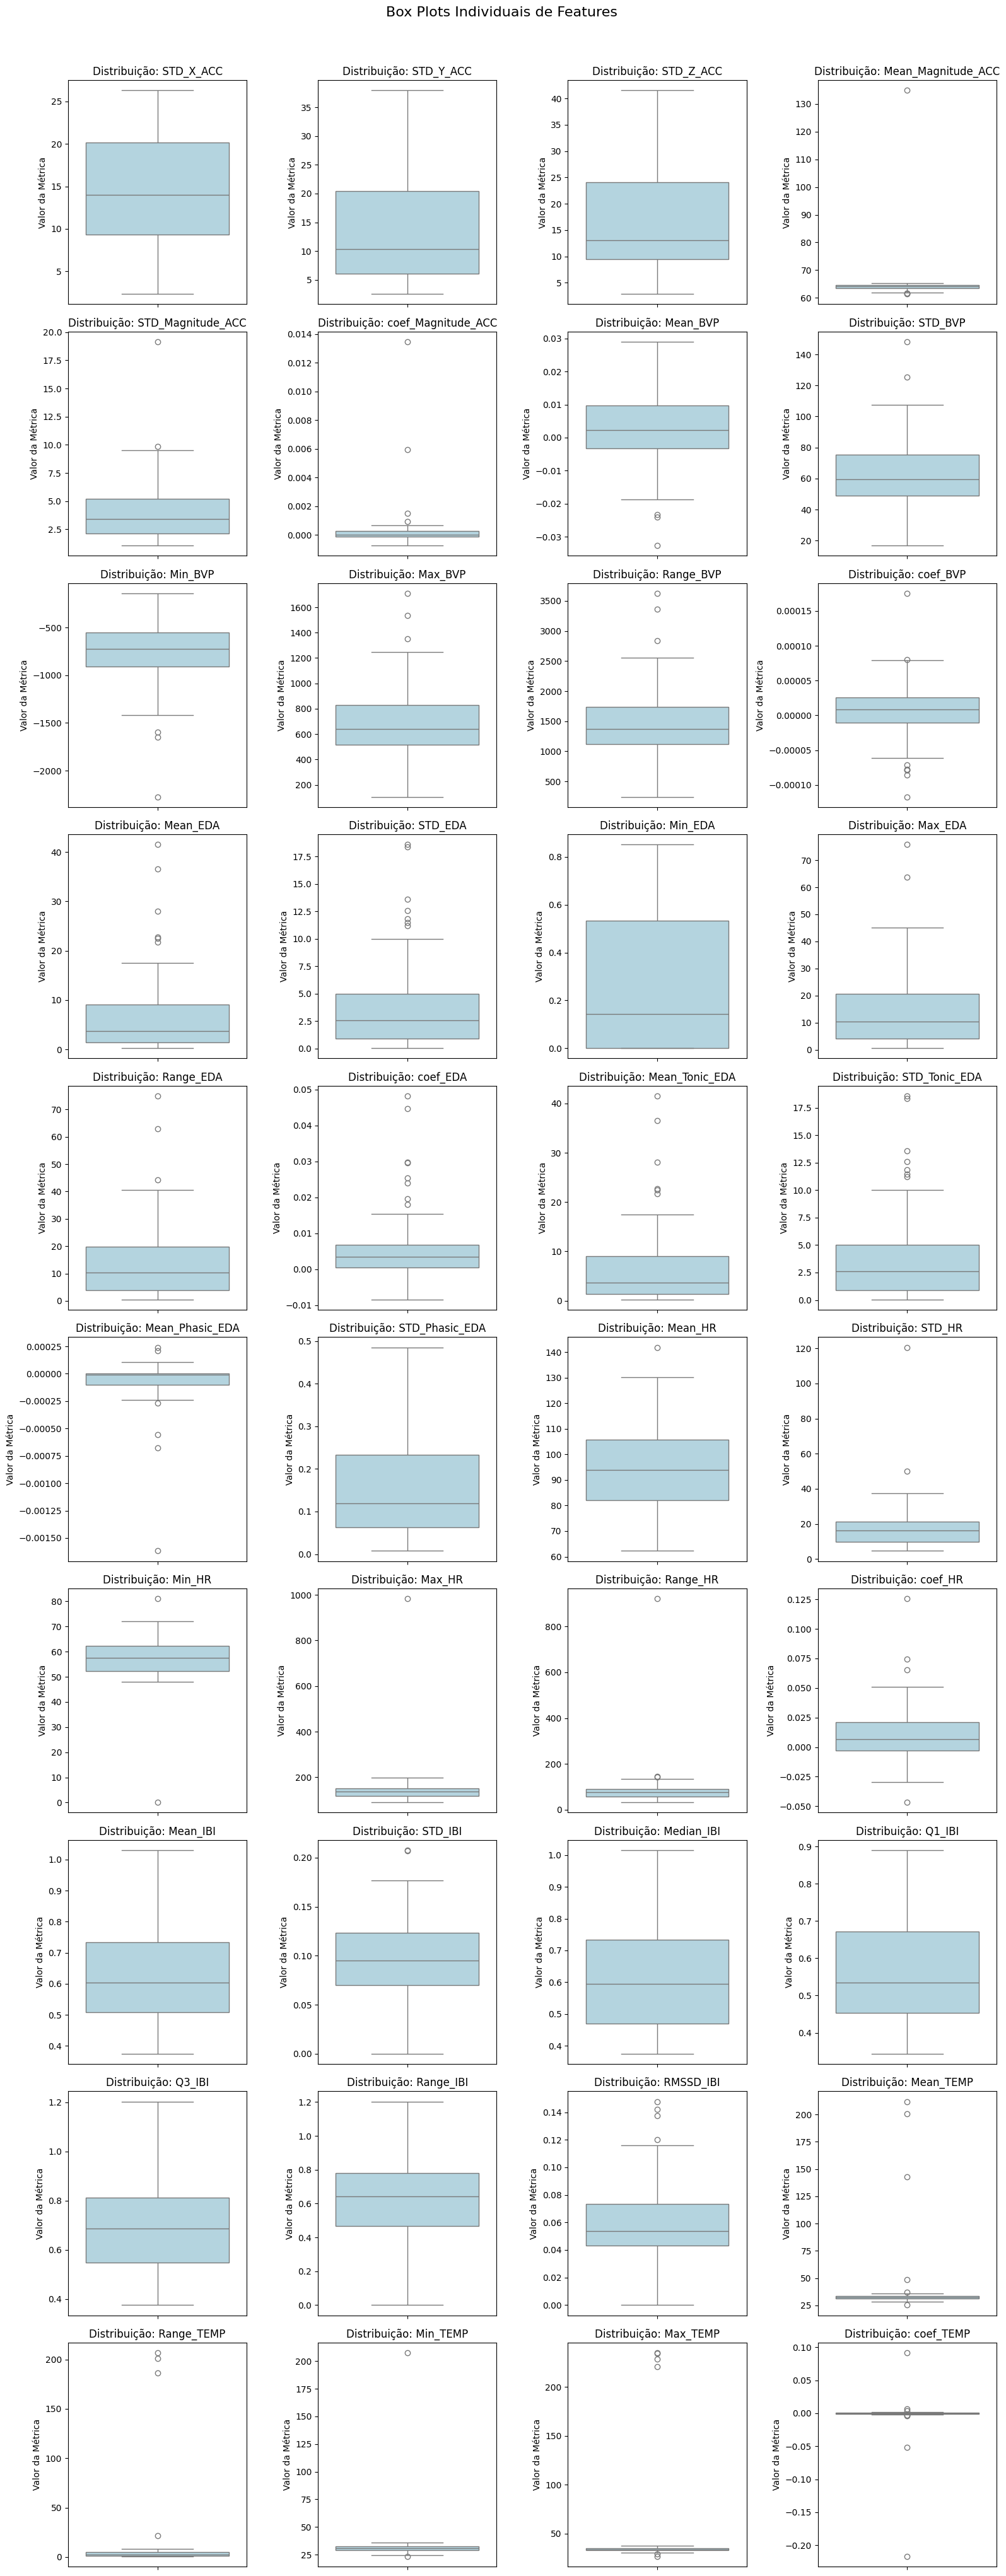

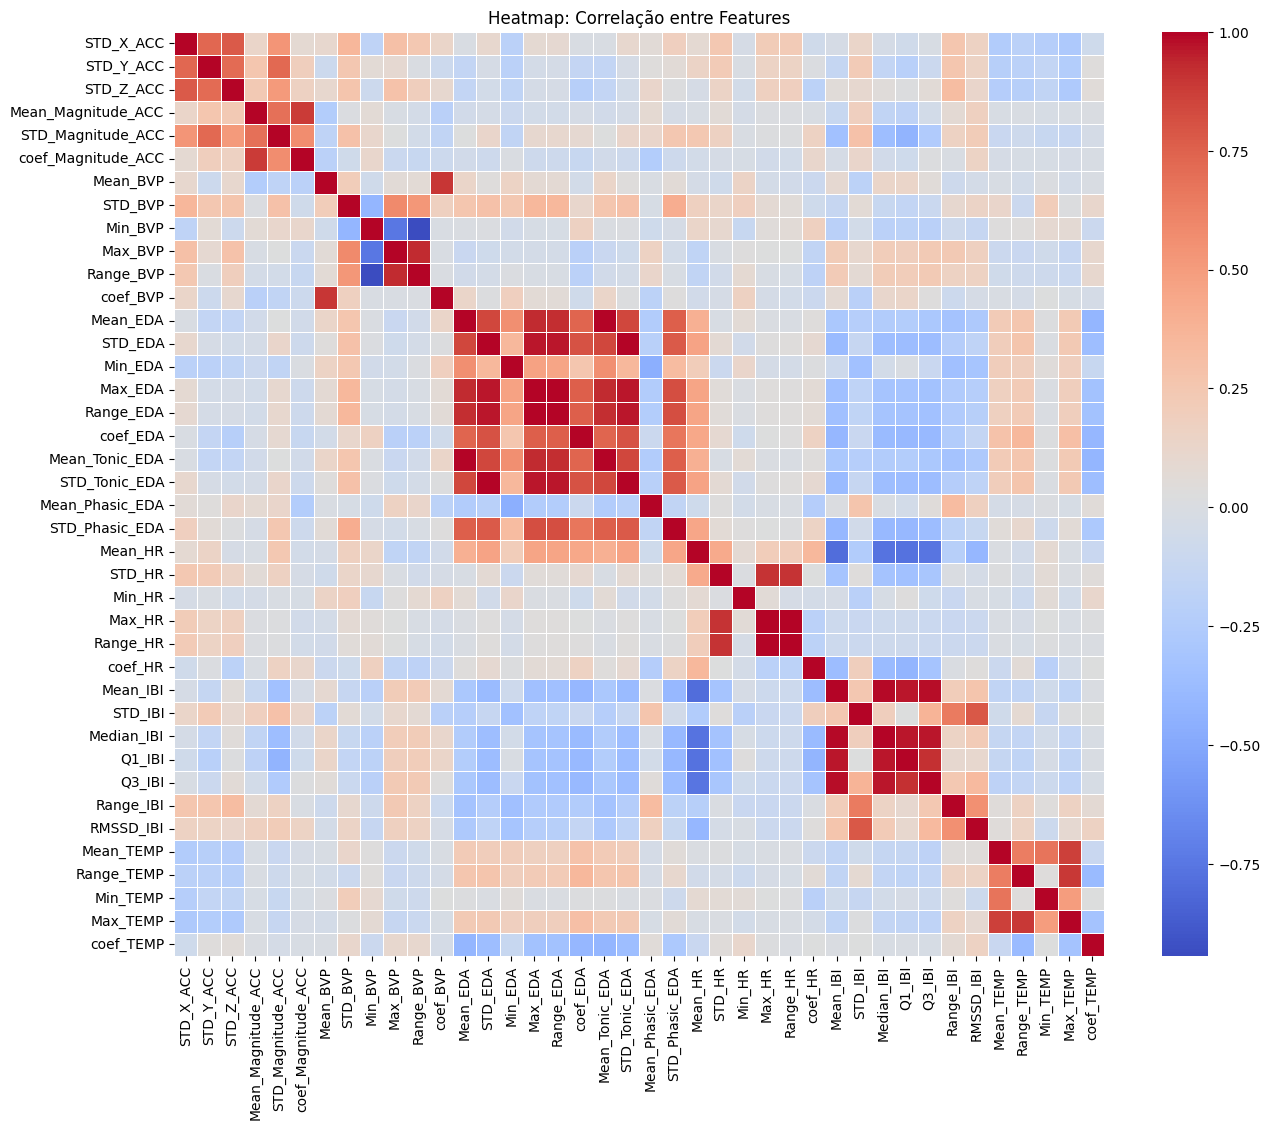

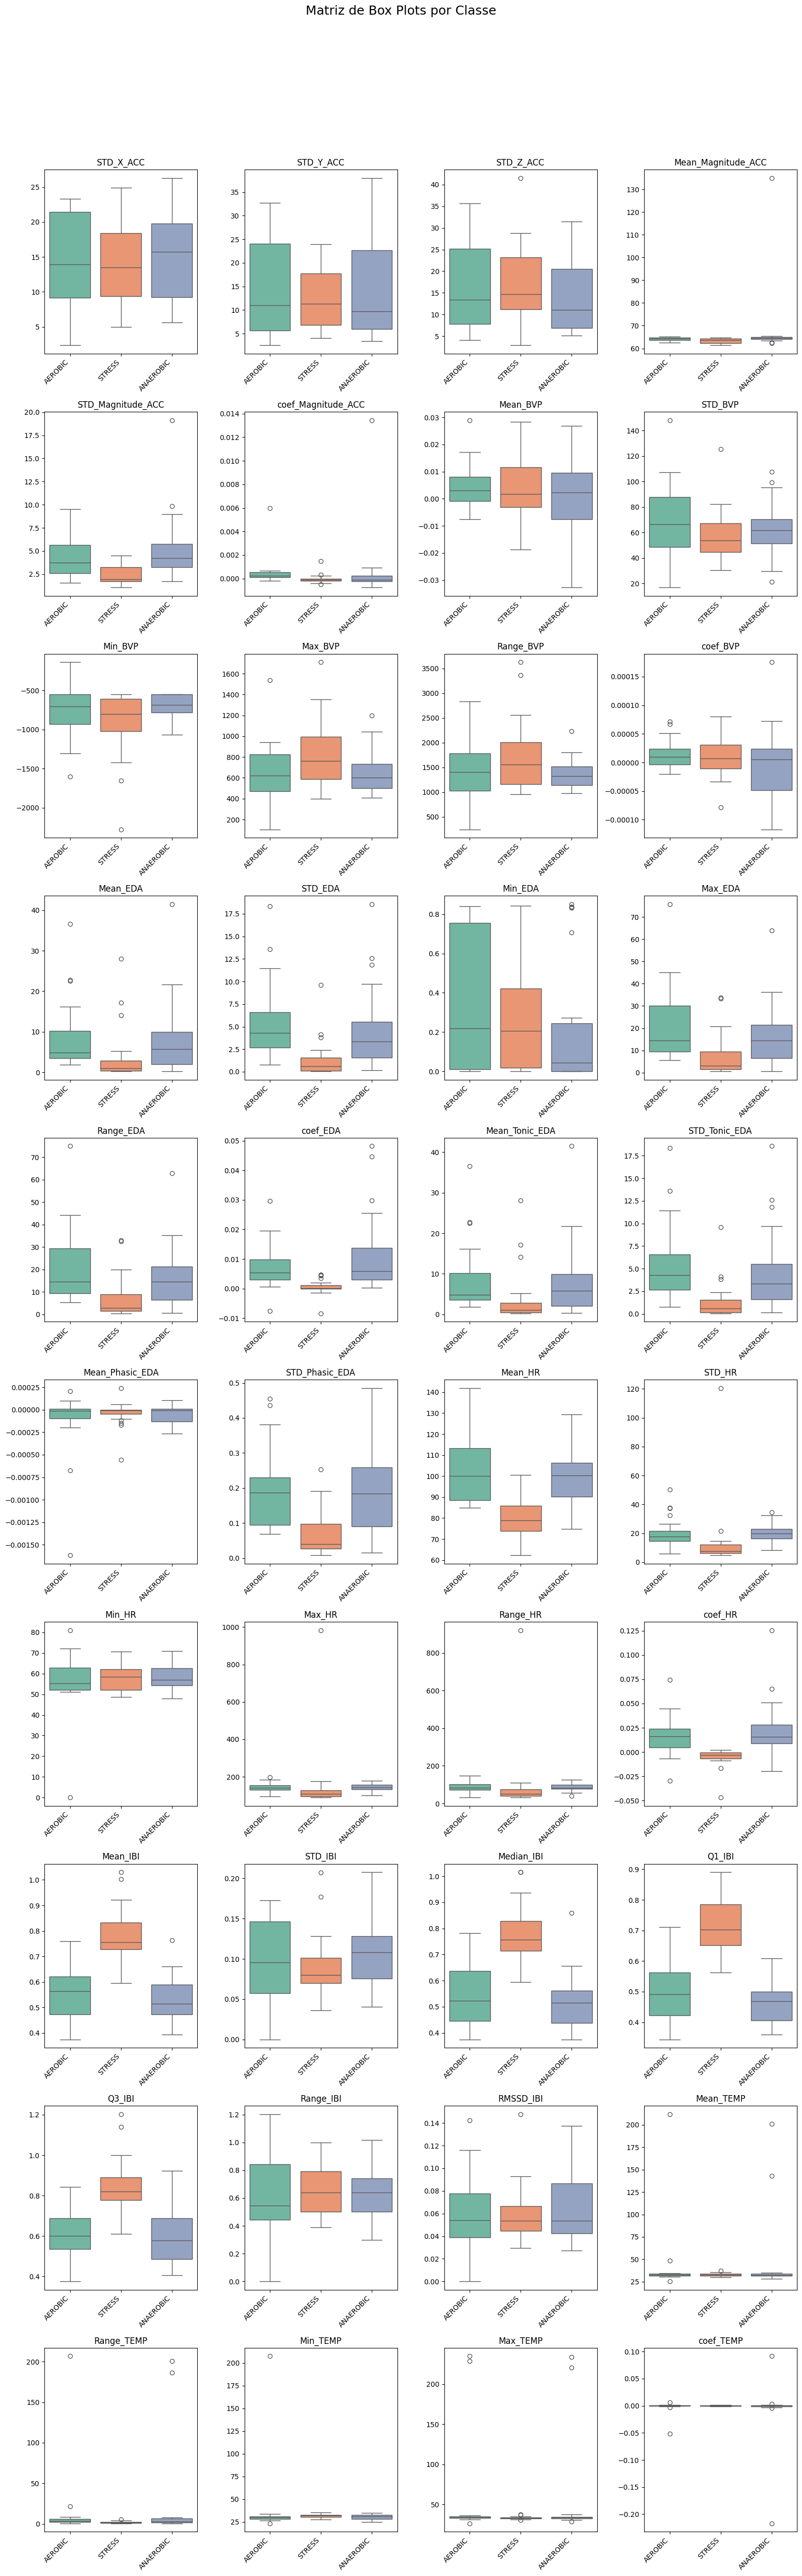

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import plot_boxplots_por_classe, plot_individual_boxplots, plot_heatmap

# 1. CONJUNTO DE BOXPLOTS INDIVIDUAIS: df_sensors
plot_individual_boxplots(df_sensors_train)

# 2. HEATMAP: df_sensors
plot_heatmap(df_sensors_train)

# BOXPLOT POR CLASSE: df_sensors
plot_boxplots_por_classe(df_sensors_train, n_cols=4)


### F-SCORE análise: *df_sensors_train*
$$\text{F-Score} = \frac{\text{Variância ENTRE os grupos (classes)}}{\text{Variância DENTRO dos grupos}}$$
Realizado o F-score para cada *feature*, indicando a força da separação entre os grupos daquela *feature*, contribuindo juntamente com os gráficos de Boxplots e HeatMap para determinar quais features podem ser removidas e quais devem ser mantidas.
- F-Score Alto e P-Value Baixo: A feature é estatisticamente significativa para separar as classes.
- F-Score Baixo e P-Value Alto: Não há evidência estatística para dizer que a média da feature difere entre as classes.

In [10]:
from scripts import compute_fscore_ranking

# Calculo F-SCORE

ranking_sensors = compute_fscore_ranking(
    df_sensors_train, 
    label_col="Label",
    id_cols=["Id"]
)

print(ranking_sensors)


               Feature    F_Score       P_Value
31              Q1_IBI  61.267002  4.175139e-16
28            Mean_IBI  44.069682  4.092907e-13
30          Median_IBI  40.685433  1.892131e-12
32              Q3_IBI  28.798120  7.483518e-10
22             Mean_HR  20.200991  1.186427e-07
21      STD_Phasic_EDA  11.609235  4.424483e-05
27             coef_HR  10.910568  7.506513e-05
17            coef_EDA   8.748247  4.062175e-04
4    STD_Magnitude_ACC   8.470216  5.077718e-04
13             STD_EDA   8.021610  7.300429e-04
19       STD_Tonic_EDA   8.004166  7.404794e-04
16           Range_EDA   6.314506  3.011562e-03
15             Max_EDA   6.188135  3.352409e-03
10           Range_BVP   3.173569  4.793853e-02
9              Max_BVP   3.118704  5.041354e-02
8              Min_BVP   2.808978  6.707467e-02
18      Mean_Tonic_EDA   2.676224  7.586187e-02
12            Mean_EDA   2.676206  7.586314e-02
23              STD_HR   1.678914  1.940016e-01
6             Mean_BVP   1.550806  2.192

### Conclusões:
- df_users_info_train: 
    
    Analisando as medidas **F-Score**  e **P-Value** de seus atributos é possível concluir que elas possuem F-Score baixo P-value elevado, indicando um baixo potencial de discriminação e um baixo significado estátistico, com possibilidade de "ocorrerência" apenas por acaso.
    
    Analisando o **boxplot** das features por classe é visualmente pereptível a sobreposição entre medianas e caixas, indicando baixo potencial discriminatório também. Além disso o **pairplot** mostra visualmente essa mesma falta de capacidade discriminativa, pela falta de separação visual entre as classes.
    
    **Portanto a conclusão é retirar todos os atributos de df_users_info**

- df_sensors_train:
    
    A análise do Boxplot por classes demonstra por meio da sobreposição entre as caixas, algumas features sem relevância para o modelo, por conta da falta de poder discriminativo:

    - features candidatas pelo Boxplot a **remoção**: todas derivadas de ACC (exceto STD_Magnitude) e de TEMP, BVP (média e o coeficiente), HR (mínimo, máximo e range), IBI (range, RMSSD)

    Além disso é possível perceber a dominância do modelo pelas features relacionadas a IBI e EDA

    A análise do HeatMap permite determinar atributos com forte correlação, o que pode indicar redundância para o modelo. Como:
    
    - Max_BVP em relação ao Range_BVP
    - Mean_EDA em relação ao STD_EDA (relativamente), ao Max_EDA e ao Range_EDA
    - Max_EDA em relação ao Range_EDA (principalmente)
    - STD_HR em relação ao Min_HR e ao Max_HR
    - Max_HR em relação ao Range_HR (principalmente)
    - Range_HR em relação ao STD_HR
    - Mean_IBI em relação ao Median_IBI, ao Q1_IBI e ao Q3_IBI (principalmente)

    Além disso de acordo com o F-Score dos atributos é possível notar novamente o domínio de atributos de EDA e IBI, e que as métricas são bem mais significativas comparadas as medidas em df_users_info. Percebendo, de acordo com a medida, que possíveis atributos candidatos a se **manter** seriam:

    - IBI: Q1_IBI, Mean_IBI, Median_IBI, Q3_IBI.
    - HR: Mean_HR, coef_HR.
    - EDA: coef_EDA, STD_EDA, Range_EDA, Max_EDA, Mean_EDA
    - outros: Range_BVP, Max_BVP, Min_BVP


Portanto as conclusões finais pela análise exploratória e interpretação de todas essas análises em conjunto, determinaos que as colunas a serem mantidas são:

- ACC: STD_Magnitude

- IBI: Q1, Mean;

- EDA: coef, STD;

- BVP: Range, Min;

- HR: Mean, coef









---
# II. Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

### Integração de Dados:
Junta *df_users_info* com *df_sensors*

In [11]:
# Junção de df_users_info com df_sensors dos treinos
df_inicial = df_users_info_train.merge(df_sensors_train, on="Id", how="right")
display(df_inicial.head(n=10))
print("\nInfo:")
df_inicial.info()
print("\nDescribe (métricas):")
print(df_inicial.describe())
print("\nShape:")
print(df_inicial.shape)
print("\nQuantidade Valores Nulos:")
print(df_inicial.isnull().sum())
print("\nLinhas Duplicadas:")
print(df_inicial.duplicated().sum())

,Id,Gender,Age,Height (cm),Weight (kg),Does physical activity regularly?,Protocol,Stress Inducement,Aerobic Exercise,Anaerobic Exercise,...,Q1_IBI,Q3_IBI,Range_IBI,RMSSD_IBI,Mean_TEMP,Range_TEMP,Min_TEMP,Max_TEMP,coef_TEMP,Label_y
0,U_27250,m,20.0,185.0,95.0,No,V1,Yes****,Yes,Yes,...,0.421875,0.515625,0.437500,0.036130,32.777873,2.34,31.71,34.05,0.001112,AEROBIC
1,U_82422,f,NaN,NaN,NaN,NaN,V2,Yes,NaN,NaN,...,0.765625,0.890625,0.781250,0.092662,32.959323,1.74,32.37,34.11,-0.000066,STRESS
2,U_35900,m,21.0,175.0,65.0,Yes,V1,Yes,Yes,Yes,...,0.359375,0.421875,0.468750,0.048288,32.440881,7.78,27.69,35.47,-0.001230,ANAEROBIC
3,U_30402,m,21.0,174.0,70.0,Yes,V1,Yes,Yes,Yes,...,0.484375,0.765625,0.687500,0.115004,32.178336,7.88,26.23,34.11,0.000472,ANAEROBIC
4,U_94914,m,21.0,172.0,70.0,Yes,V1,Yes,Yes,Yes***,...,0.609375,0.703125,0.437500,0.034005,33.698857,0.69,33.15,33.84,-0.000032,STRESS
5,U_81466,f,29.0,154.0,56.0,No,V2,Yes,Yes,Yes,...,0.484375,0.671875,0.812500,0.067572,32.211160,3.46,30.95,34.41,-0.000888,ANAEROBIC
6,U_92226,m,NaN,NaN,NaN,NaN,V2,Yes,NaN,NaN,...,0.734375,0.828125,0.718750,0.045369,30.274936,3.96,27.55,31.51,0.000981,STRESS
7,U_20551,f,25.0,152.0,61.0,No,V2,Yes,Yes,Yes,...,0.359375,0.531250,0.984375,0.073149,31.897457,5.64,28.17,33.81,0.000440,AEROBIC
8,U_94349,m,21.0,192.0,84.0,Yes,V1,Yes,Yes,Yes****,...,0.546875,0.609375,0.531250,0.048204,32.467922,6.02,29.87,35.89,-0.003386,AEROBIC
9,U_38235,m,21.0,173.0,72.0,Yes,V1,Yes,Yes,Yes,...,0.777344,0.878906,0.500000,0.046391,33.580589,2.38,31.53,33.91,0.000339,STRESS



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Id                                 73 non-null     object 
 1   Gender                             73 non-null     object 
 2   Age                                69 non-null     float64
 3   Height (cm)                        69 non-null     float64
 4   Weight (kg)                        69 non-null     float64
 5   Does physical activity regularly?  69 non-null     object 
 6   Protocol                           73 non-null     object 
 7   Stress Inducement                  73 non-null     object 
 8   Aerobic Exercise                   68 non-null     object 
 9   Anaerobic Exercise                 69 non-null     object 
 10  Label_x                            73 non-null     object 
 11  STD_X_ACC                          73 non-null     fl

### Eliminação Manual de Atributos: 
extra --> limpeza inicial

conforme conclusão da etapa de Análise Exploratória, ocorre a seleção apenas dos atributos mais significativos para o modelo. Além disso também é feito uma limpeza para tratar/remover amostras inválidas ou nulas de acordo com os campos de especificação de atividade realizada no experimento (Stress Inducement, Aerobic Exercise, Anaerobic Exercise) -> (ex: Yes*, Yes**)

In [12]:
from scripts import clean_users_info

# 1. Dados treino
# Limpeza: Nulos e inválidos --> limpa o DataFrame removendo casos inválidos/nulos ou substituindo por cálculos de média
df_inicial_clean = clean_users_info(df_inicial)

# Eliminação Manual de Atributos de acordo com a análise exploratória
cols_keep = [
    "Id", "Q1_IBI", "Mean_IBI", "Mean_HR", "STD_Phasic_EDA", "coef_EDA", "STD_EDA", "Q3_IBI", "coef_HR", "Median_IBI", "STD_Tonic_EDA"
]

df_inicial_sumarized = df_inicial_clean[cols_keep].copy()
df_inicial_sumarized = df_inicial_sumarized.merge(df_train, on="Id", how="left")

display(df_inicial_sumarized.head(n=5))
print("\nInfo:")
df_inicial_sumarized.info()

# 2. Dados teste
df_test = df_users_info_test.merge(df_sensors_test, on="Id", how="right")
df_test = df_test[cols_keep]

display(df_test.head(n=5))
print("\nInfo:")
df_test.info()

,Id,Q1_IBI,Mean_IBI,Mean_HR,STD_Phasic_EDA,coef_EDA,STD_EDA,Q3_IBI,coef_HR,Median_IBI,STD_Tonic_EDA,Label
0,U_27250,0.421875,0.475569,127.322017,0.200443,0.010811,6.981441,0.515625,0.023684,0.468750,6.977137,AEROBIC
1,U_35900,0.359375,0.401432,100.382926,0.073787,0.003196,1.133286,0.421875,0.050792,0.390625,1.130228,ANAEROBIC
2,U_30402,0.484375,0.623003,94.000148,0.241557,0.005845,2.201314,0.765625,0.048240,0.578125,2.183626,ANAEROBIC
3,U_94914,0.609375,0.661508,90.996764,0.144604,0.004567,2.137557,0.703125,-0.006675,0.656250,2.132457,STRESS
4,U_81466,0.484375,0.579449,97.993704,0.245786,0.002942,3.405119,0.671875,0.011351,0.546875,3.392914,ANAEROBIC



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              59 non-null     object 
 1   Q1_IBI          59 non-null     float64
 2   Mean_IBI        59 non-null     float64
 3   Mean_HR         59 non-null     float64
 4   STD_Phasic_EDA  59 non-null     float64
 5   coef_EDA        59 non-null     float64
 6   STD_EDA         59 non-null     float64
 7   Q3_IBI          59 non-null     float64
 8   coef_HR         59 non-null     float64
 9   Median_IBI      59 non-null     float64
 10  STD_Tonic_EDA   59 non-null     float64
 11  Label           59 non-null     object 
dtypes: float64(10), object(2)
memory usage: 5.7+ KB


,Id,Q1_IBI,Mean_IBI,Mean_HR,STD_Phasic_EDA,coef_EDA,STD_EDA,Q3_IBI,coef_HR,Median_IBI,STD_Tonic_EDA
0,U_19341,0.890625,0.916079,65.422045,0.221085,-0.000273,2.189661,0.953125,-0.000383,0.921875,2.176439
1,U_54670,0.625000,0.677904,88.325071,0.130750,0.002138,1.198566,0.718750,0.009966,0.671875,1.190834
2,U_21920,0.812500,0.869439,69.992598,0.297800,-0.003174,3.025606,0.921875,-0.001384,0.875000,3.005146
3,U_58128,0.468750,0.532813,74.241641,0.322522,0.008396,4.746677,0.578125,0.007104,0.484375,4.732498
4,U_73365,0.515625,0.558083,100.750509,0.256463,0.013169,8.659194,0.593750,0.015185,0.562500,8.653702



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              25 non-null     object 
 1   Q1_IBI          25 non-null     float64
 2   Mean_IBI        25 non-null     float64
 3   Mean_HR         25 non-null     float64
 4   STD_Phasic_EDA  25 non-null     float64
 5   coef_EDA        25 non-null     float64
 6   STD_EDA         25 non-null     float64
 7   Q3_IBI          25 non-null     float64
 8   coef_HR         25 non-null     float64
 9   Median_IBI      25 non-null     float64
 10  STD_Tonic_EDA   25 non-null     float64
dtypes: float64(10), object(1)
memory usage: 2.3+ KB


### Limpeza:
Trata/remove Outliers, Verfica o balanceamento dos dados e aplica normalização

In [13]:
from scripts import removeOutliers, check_remove_outlier, replace_outliers

# sem remover outlier, apenas substituindo ele pela média dos valores de mesmo label
df_inicial_clean_without_outliers = replace_outliers(df_inicial_sumarized)


# limpando dataframe de train.csv para utilização na validação cruzada
df_train_clean = df_inicial_clean_without_outliers[["Id", "Label"]]
df_train_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      59 non-null     object
 1   Label   59 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


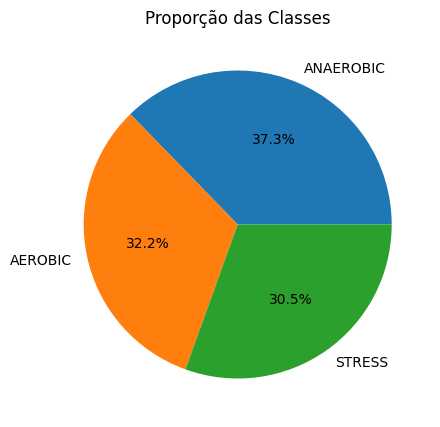

In [14]:
# Verificação Balanceamento
df_inicial_clean_without_outliers['Label'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.title("Proporção das Classes")
plt.ylabel('')
plt.show()

In [15]:
# Normalização

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.preprocessing import RobustScaler
from scripts import normalize_dataset
# criação do dataframe de treino final
df_treinamento = df_inicial_clean_without_outliers.sort_values(by="Id") # garantia de ordenação para usar validação cruzada posteriromente
df_treinamento = df_treinamento.drop(columns=["Id", "Label"])
df_teste = df_test.drop(columns=["Id"])

# Diversas normalizações
# Normalização Standard
df_treino_std, df_teste_std = normalize_dataset(
    df_treinamento,
    df_teste,
    scaler=StandardScaler()
)

# Normalização MinMax
df_treino_minmax, df_teste_minmax = normalize_dataset(
    df_treinamento,
    df_teste,
    scaler=MinMaxScaler()
)

# Normalização Normalizer
df_treino_normalizer, df_teste_normalizer = normalize_dataset(
    df_treinamento,
    df_teste,
    scaler=Normalizer()
)

display(df_treino_std.head(n=5))
display(df_teste_std.head(n=5))
display(df_treino_minmax.head(n=5))
display(df_teste_minmax.head(n=5))
display(df_treino_normalizer.head(n=5))
display(df_teste_normalizer.head(n=5))


,Q1_IBI,Mean_IBI,Mean_HR,STD_Phasic_EDA,coef_EDA,STD_EDA,Q3_IBI,coef_HR,Median_IBI,STD_Tonic_EDA
0,-0.712310,-0.776648,1.899783,2.234925,0.507715,0.487060,-0.770061,0.320124,-0.776362,0.486384
1,-1.259528,-1.632597,0.086985,-0.674801,-0.415972,-0.381463,-1.821719,-0.042894,-1.444356,-0.379836
2,-1.040641,-1.144887,0.895439,-0.827015,-0.671735,-0.794702,-1.248087,0.936115,-1.062645,-0.793431
3,-0.274536,-0.401117,0.859655,2.646673,0.222132,0.084735,-0.292035,-0.056169,-0.203795,0.084414
4,-1.368971,-1.068780,1.393630,0.232255,-0.007497,0.715445,-0.865666,0.798561,-1.348928,0.715196


,Q1_IBI,Mean_IBI,Mean_HR,STD_Phasic_EDA,coef_EDA,STD_EDA,Q3_IBI,coef_HR,Median_IBI,STD_Tonic_EDA
0,2.352108,1.953529,-1.918195,0.455722,-1.215712,-0.392304,1.715676,-0.520291,1.895616,-0.395143
1,0.491568,0.374968,-0.339299,-0.294052,-0.550187,-0.780557,0.281597,0.175602,0.368772,-0.781358
2,1.804890,1.644408,-1.603109,1.092446,-2.016607,-0.064831,1.524466,-0.587613,1.609333,-0.070409
3,-0.602867,-0.586659,-1.310187,1.297637,1.177424,0.609383,-0.578850,-0.016833,-0.776362,0.606465
4,-0.274536,-0.419176,0.517290,0.749356,2.495247,2.142075,-0.483245,0.526538,-0.299223,2.143015


,Q1_IBI,Mean_IBI,Mean_HR,STD_Phasic_EDA,coef_EDA,STD_EDA,Q3_IBI,coef_HR,Median_IBI,STD_Tonic_EDA
0,0.200000,0.197070,0.899875,0.896105,0.391818,0.393691,0.224490,0.533082,0.170732,0.393099
1,0.057143,0.000000,0.495903,0.161907,0.177071,0.195052,0.000000,0.463674,0.000000,0.195005
2,0.114286,0.112288,0.676062,0.123499,0.117609,0.100540,0.122449,0.650857,0.097561,0.100421
3,0.314286,0.283531,0.668088,1.000000,0.325423,0.301676,0.326531,0.461136,0.317073,0.301173
4,0.028571,0.129811,0.787082,0.390780,0.272037,0.445925,0.204082,0.624557,0.024390,0.445425


,Q1_IBI,Mean_IBI,Mean_HR,STD_Phasic_EDA,coef_EDA,STD_EDA,Q3_IBI,coef_HR,Median_IBI,STD_Tonic_EDA
0,1.000000,0.825654,0.049058,0.447167,-0.008860,0.192572,0.755102,0.372397,0.853659,0.191505
1,0.514286,0.462213,0.400907,0.257979,0.145867,0.103775,0.448980,0.505450,0.463415,0.103182
2,0.857143,0.754484,0.119274,0.607829,-0.195059,0.267469,0.714286,0.359526,0.780488,0.265767
3,0.228571,0.240812,0.184550,0.659604,0.547518,0.421668,0.265306,0.468657,0.170732,0.420560
4,0.314286,0.279373,0.591794,0.521258,0.853897,0.772209,0.285714,0.572547,0.292683,0.771950


,Q1_IBI,Mean_IBI,Mean_HR,STD_Phasic_EDA,coef_EDA,STD_EDA,Q3_IBI,coef_HR,Median_IBI,STD_Tonic_EDA
0,0.003746,0.004167,0.998617,0.003600,0.000049,0.036657,0.004521,0.000100,0.004004,0.036587
1,0.003966,0.003966,0.999419,0.000898,0.000028,0.023448,0.003966,0.000071,0.003966,0.023429
2,0.003823,0.004222,0.999846,0.000626,0.000016,0.010941,0.004412,0.000200,0.004118,0.010918
3,0.004872,0.005299,0.998896,0.004583,0.000047,0.032196,0.005905,0.000062,0.005463,0.032128
4,0.003161,0.004047,0.998022,0.001708,0.000036,0.044134,0.004673,0.000169,0.003436,0.044068


,Q1_IBI,Mean_IBI,Mean_HR,STD_Phasic_EDA,coef_EDA,STD_EDA,Q3_IBI,coef_HR,Median_IBI,STD_Tonic_EDA
0,0.013593,0.013981,0.998488,0.003374,-0.000004,0.033419,0.014547,-0.000006,0.014070,0.033217
1,0.007074,0.007673,0.999700,0.001480,0.000024,0.013566,0.008135,0.000113,0.007605,0.013478
2,0.011583,0.012395,0.997833,0.004246,-0.000045,0.043134,0.013142,-0.000020,0.012474,0.042842
3,0.006288,0.007147,0.995844,0.004326,0.000113,0.063670,0.007755,0.000095,0.006497,0.063480
4,0.005080,0.005498,0.992635,0.002527,0.000130,0.085314,0.005850,0.000150,0.005542,0.085260


In [16]:
conjuntos_treino = {
    'StandardScaler': df_treino_std,
    'MinMaxScaler': df_treino_minmax,
    'Normalizer': df_treino_normalizer,
}

---
# III. Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

### Avaliação de diferentes técnicas de pré-processamento e Ajuste de parâmetros

In [17]:
from scripts import comparacao_em_grade_modelos
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# garante que X_train (df_treinamento) estpa na mesma ordem que as as classes Y_train (y_treinamento)
y_treinamento = df_train_clean.sort_values(by="Id")['Label']
# Label encoded para as classes
encoded = {"STRESS": 0 , "AEROBIC": 1, "ANAEROBIC": 2}
y_treinamento_codificado = y_treinamento.map(encoded).values

# Definição dos modelos
SEED = 42

modelos_para_teste = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=SEED),

    "KNN": KNeighborsClassifier(),

    "Naive Bayes": GaussianNB(),

    "SVM Linear": SVC(kernel="linear", probability=True, random_state=SEED),
    "SVM RBF": SVC(kernel="rbf", probability=True, random_state=SEED),

    "MLP": MLPClassifier(max_iter=2000, random_state=SEED, early_stopping=True),

    "Random Forest": RandomForestClassifier(random_state=SEED),
}

# Lista de K (n_neighbors) para o Grid Search do KNN
knn_n_neighbors_values = [1, 3, 5, 7, 9]

# Lista de de K (folds) para o K-Fold Cross-Validation
k_fold_values = [3, 4, 5, 10] 


# Compara os modelos enquanto ajusta os parâmetros
comparacao_em_grade_modelos(
    modelos=modelos_para_teste,
    conjuntos_treino=conjuntos_treino, 
    y_treinamento=y_treinamento_codificado,
    k_values=k_fold_values,
    knn_params=knn_n_neighbors_values 
)


Busca para: Logistic Regression | Técnica: StandardScaler
Logistic Regression | StandardScaler | K=3 | Params={'C': 0.1} => Acc=0.5088, F1=0.4909
Logistic Regression | StandardScaler | K=3 | Params={'C': 1} => Acc=0.4395, F1=0.4204
Logistic Regression | StandardScaler | K=3 | Params={'C': 10} => Acc=0.4228, F1=0.4186
Logistic Regression | StandardScaler | K=4 | Params={'C': 0.1} => Acc=0.5250, F1=0.5182
Logistic Regression | StandardScaler | K=4 | Params={'C': 1} => Acc=0.5250, F1=0.5103
Logistic Regression | StandardScaler | K=4 | Params={'C': 10} => Acc=0.5095, F1=0.5032
Logistic Regression | StandardScaler | K=5 | Params={'C': 0.1} => Acc=0.5439, F1=0.5374
Logistic Regression | StandardScaler | K=5 | Params={'C': 1} => Acc=0.4758, F1=0.4605
Logistic Regression | StandardScaler | K=5 | Params={'C': 10} => Acc=0.4773, F1=0.4803
Logistic Regression | StandardScaler | K=10 | Params={'C': 0.1} => Acc=0.5600, F1=0.5222
Logistic Regression | StandardScaler | K=10 | Params={'C': 1} => Acc=

In [18]:
# Teste comparativo com DummyClassifier para comparar a acurácia do modelo com um "chute"
from scripts import avaliar_dummy_baseline

resultado_dummyClassifier = avaliar_dummy_baseline(df_treino_minmax, y_treinamento)

[Dummy: most frequent]  Acurácia Média = 0.3742  (+/- 0.0515)
[Dummy: stratified]  Acurácia Média = 0.3591  (+/- 0.1118)


### Curvas de aprendizado, detecção e correção de sobreajustamento ou subajustamento

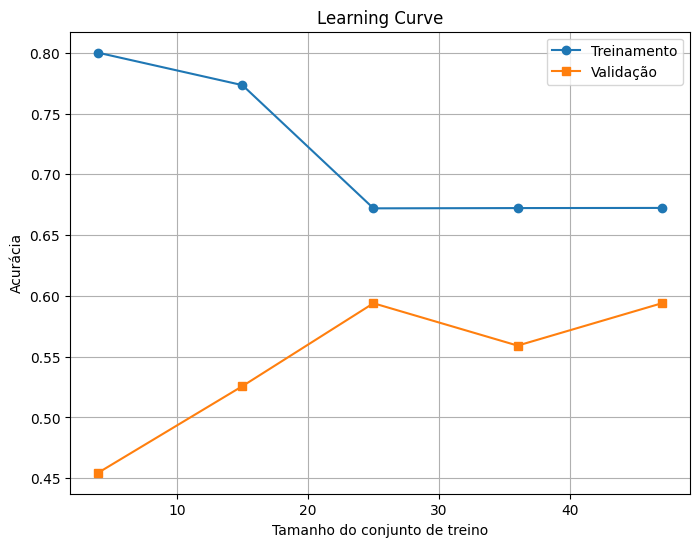

(array([ 4, 15, 25, 36, 47]),
 array([0.8       , 0.77333333, 0.672     , 0.67222222, 0.67234043]),
 array([0.45454545, 0.52575758, 0.59393939, 0.55909091, 0.59393939]))

In [ ]:
from scripts import plot_learning_curve
# CURVA DE APRENDIZADO
best_model = SVC(kernel="linear", probability=True, random_state=SEED)
parametros_otimizados = {'C': 1}
best_model.set_params(**parametros_otimizados)
plot_learning_curve(best_model, df_treino_minmax, y_treinamento_codificado)


### Análise de redução de dimensionalidade para visualização dos dados e aceleração do treinamento, se necessário

### Análise de desempenho individual e comparação dos resultados usando modelos estatísticos

---
# IV. Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.

# teste de envio: com o modelo de melhor desempenho

In [ ]:
# Treinando o modelo final com a melhor técnica
X_treino_final = df_treino_minmax
modelo_final = best_model
modelo_final.set_params(**parametros_otimizados)
modelo_final.fit(X_treino_final, y_treinamento_codificado)

# Previsão das probabilidades no conjunto de teste
X_teste_final = df_teste_minmax
y_proba_pred = modelo_final.predict_proba(X_teste_final)

# Criação do DataFrame de Saída
df_saida = pd.DataFrame(y_proba_pred, columns=[f'Predicted_{c}' for c in modelo_final.classes_])

# Inserindo a coluna Id
df_saida.insert(0, 'Id', df_test['Id'].reset_index(drop=True)) # Ajuste conforme seu df_teste_original

# Visualização da saída
print(df_saida)

# Salvar no formato CSV
df_saida.to_csv('submission_baseline.csv', index=False)